In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings 
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('Wind_data.csv')
df = pd. DataFrame(dataset)

In [3]:
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values
y = y.reshape(len(y),1)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = sc.fit_transform(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [6]:
# Part 2 - Building the CNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense


# Part 2 - Building the CNN

# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2])))
cnn.add(tf.keras.layers.Dropout(0.25))  # Add dropout after the first convolutional layer


# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool1D(pool_size=3, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool1D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.25))  # Add dropout after the second convolutional layer


# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.25))  # Add dropout after the dense layer


# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=1))

# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mae'])

In [7]:
cnn.fit(X_train, y_train, epochs = 100)

Epoch 1/100
91/91 [==============================] - 1s 7ms/step - loss: 0.0843 - mae: 0.0843
Epoch 2/100
91/91 [==============================] - 1s 8ms/step - loss: 0.0700 - mae: 0.0700
Epoch 3/100
91/91 [==============================] - 1s 6ms/step - loss: 0.0676 - mae: 0.0676
Epoch 4/100
91/91 [==============================] - 1s 7ms/step - loss: 0.0655 - mae: 0.0655
Epoch 5/100
91/91 [==============================] - 1s 6ms/step - loss: 0.0653 - mae: 0.0653
Epoch 6/100
91/91 [==============================] - 1s 6ms/step - loss: 0.0616 - mae: 0.0616
Epoch 7/100
91/91 [==============================] - 1s 6ms/step - loss: 0.0625 - mae: 0.0625
Epoch 8/100
91/91 [==============================] - 1s 6ms/step - loss: 0.0604 - mae: 0.0604
Epoch 9/100
91/91 [==============================] - 1s 7ms/step - loss: 0.0615 - mae: 0.0615
Epoch 10/100
91/91 [==============================] - 1s 7ms/step - loss: 0.0612 - mae: 0.0612
Epoch 11/100
91/91 [==============================] - 1s 8m

In [8]:
from sklearn.metrics import mean_absolute_error
y_predict = cnn.predict(X_test)
y_predict = sc.inverse_transform(y_predict)
mae = mean_absolute_error(y_test, y_predict)
print('MAE: %.3f' % mae)

MAE: 0.046


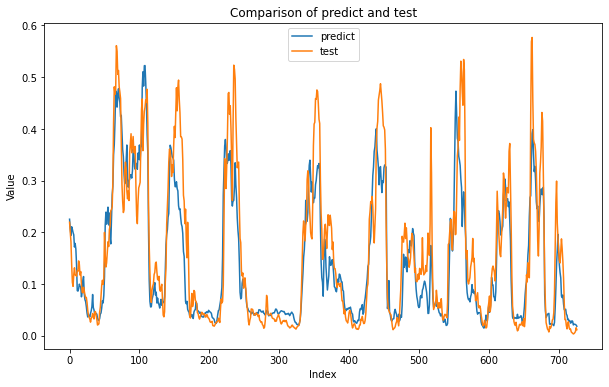

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_predict, label='predict')
plt.plot(y_test, label='test')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of predict and test')
plt.legend()

# Show the plot
plt.show()